In [95]:
# Define Modules that we need in this project

import pandas                       as pd
import numpy                        as np
import matplotlib.pyplot            as plt
import seaborn                      as sns

from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.manifold               import LocallyLinearEmbedding
from sklearn.manifold               import Isomap
from sklearn.manifold               import TSNE
from mpl_toolkits.mplot3d           import Axes3D
from sklearn.preprocessing          import StandardScaler

In [96]:
def Label2Index(x): # This function transform all fake images to 0 and real images to 1
    if 'fake' in x:
        return 0
    else:
        return 1

In [97]:
df = pd.read_csv('dataset2.csv')    # read from file
df = df.replace(-np.Inf, 0)         # remove infinity numbers -> one number infinite
df.head();                          # show 5 upper rows

In [98]:
ss = StandardScaler()
df.iloc[:, :-1] = ss.fit_transform(df.iloc[:, :-1]) # Normalize dataset for speed running

In [99]:
df.label = df.label.apply(Label2Index)              # Transform labels by Label2Index function

In [100]:
X = df.iloc[:, :-1] # assign data  to X
y = df.iloc[:, -1]  # assign lable to y

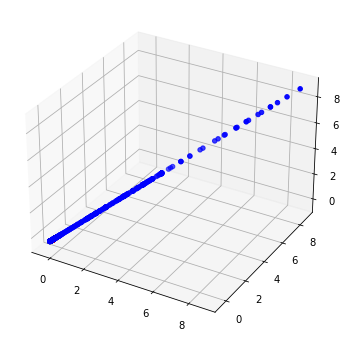

In [101]:
fig, axs = plt.subplots(1, 1, figsize=(18, 6), subplot_kw={'projection': '3d'})

# plot three feature of dataset (hist_b, hist_g, hist_r)
axs.scatter(df.loc[np.where(y == 1)[0], 'hist_b'], df.loc[np.where(y == 1)[0], 'hist_g'], df.loc[np.where(y == 1)[0], 'hist_r'], c='b')
axs.scatter(df.loc[np.where(y == 0)[0], 'hist_b'], df.loc[np.where(y == 0)[0], 'hist_g'], df.loc[np.where(y == 0)[0], 'hist_r'], c='r')
plt.show()

<font color="#00FF00"><h3><font color="#00FF00"><h3>$$LDA (Linear Discriminant Analysis)$$</h3></font></h3></font>

In [83]:
lda_1          = LinearDiscriminantAnalysis(n_components = 1)   # dimension reduction to 1
L1             = lda_1.fit_transform(X, y)

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 1$$</h3></font></h3></font>

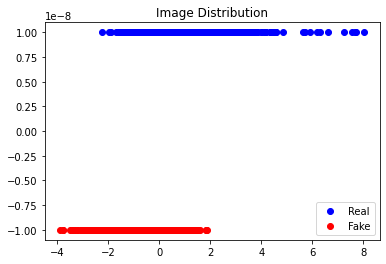

In [89]:
# types       = ['real'  , 'fake'  ]
types         = [1, 0]

# show fake and real images after LDA (Dimension Reduction 1)
plt.scatter(L1[y == types[0]], np.zeros_like(L1[np.where(y == types[0])]) + 1e-8, c = 'b', label = 'Real')
plt.scatter(L1[y == types[1]], np.zeros_like(L1[np.where(y == types[1])]) - 1e-8, c = 'r', label = 'Fake')
plt.title('Image Distribution')
plt.legend()

plt.show()

<font color="#00FF00"><h2><font color="#00FF00"><h2>$$t-SNE$$</h2></font></h2></font>

In [86]:
tsne_1   = TSNE(n_components=1, random_state=42)    # dimension reduction to 1
X_tsne_1 = tsne_1.fit_transform(X)

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 1$$</h3></font></h3></font>

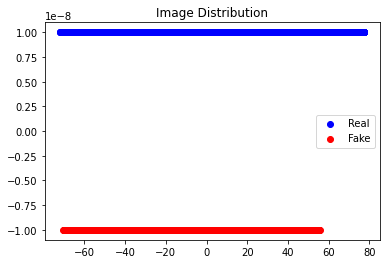

In [88]:
# types       = ['real'  , 'fake'  ]
types         = [1  , 0  ]

# show fake and real images after LDA (Dimension Reduction 1)
plt.scatter(X_tsne_1[y == types[0]], np.zeros_like(X_tsne_1[np.where(y == types[0])]) + 1e-8, c = 'b', label = 'Real')
plt.scatter(X_tsne_1[y == types[1]], np.zeros_like(X_tsne_1[np.where(y == types[1])]) - 1e-8, c = 'r', label = 'Fake')
plt.title('Image Distribution')
plt.legend()

plt.show()

<font color="#00FF00"><h2><font color="#00FF00"><h2>$$Isomap$$</h2></font></h2></font>

In [90]:
%%capture
isomap_1 = Isomap(n_components=1, n_neighbors=5)    # dimension reduction to 1 and number of neighbor is 5
isomap_1 = isomap_1.fit_transform(X)

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 1$$</h3></font></h3></font>

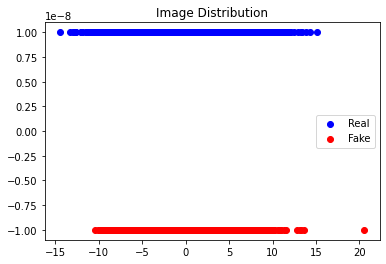

In [91]:
# types       = ['real'  , 'fake'  ]
types         = [1, 0]

# show fake and real images after LDA (Dimension Reduction 1)
plt.scatter(isomap_1[y == types[0]], np.zeros_like(isomap_1[np.where(y == types[0])]) + 1e-8, c = 'b', label = 'Real')
plt.scatter(isomap_1[y == types[1]], np.zeros_like(isomap_1[np.where(y == types[1])]) - 1e-8, c = 'r', label = 'Fake')
plt.title('Image Distribution')
plt.legend()

plt.show()

<font color="#00FF00"><h3><font color="#00FF00"><h3>$$(LLE) Locally Linear Embedding$$</h3></font></h3></font>

In [92]:
lle_1   = LocallyLinearEmbedding(n_components=1, n_neighbors=5) # dimension reduction to 1
X_lle_1 = lle_1.fit_transform(X)

<font color="#e30b5d"><h3><font color="#e30b5d"><h3>$$n_{components} = 1$$</h3></font></h3></font>

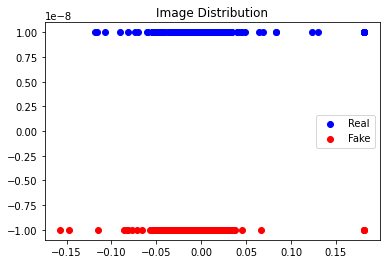

In [94]:
# types       = ['real'  , 'fake'  ]
types         = [1, 0]

# show fake and real images after LDA (Dimension Reduction 1)
plt.scatter(X_lle_1[y == types[0]], np.zeros_like(X_lle_1[np.where(y == types[0])]) + 1e-8, c = 'b', label = 'Real')
plt.scatter(X_lle_1[y == types[1]], np.zeros_like(X_lle_1[np.where(y == types[1])]) - 1e-8, c = 'r', label = 'Fake')
plt.title('Image Distribution')
plt.legend()

plt.show()